Importing packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Load CSV data 

In [8]:
prices_df = pd.read_csv("prices.csv")

#displaying the first 5 rows of the price dataframe

prices_df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [ ]:
#Checking the data typesof the dataframe
prices_df.info()
prices_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


Converting datatypes

In [ ]:
#Convert the intergers to floats
prices_df[['Tomato', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Elephant Yam (Suran)']] = prices_df[['Tomato', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Elephant Yam (Suran)']].astype(float)

#Convert the date format
prices_df["Price Dates"] = pd.to_datetime(prices_df["Price Dates"], format="%d-%m-%Y")
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Price Dates             287 non-null    datetime64[ns]
 1   Bhindi (Ladies finger)  287 non-null    float64       
 2   Tomato                  287 non-null    float64       
 3   Onion                   287 non-null    float64       
 4   Potato                  287 non-null    float64       
 5   Brinjal                 287 non-null    float64       
 6   Garlic                  287 non-null    float64       
 7   Peas                    287 non-null    float64       
 8   Methi                   287 non-null    float64       
 9   Green Chilli            287 non-null    float64       
 10  Elephant Yam (Suran)    287 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 24.8 KB


Correcting the Outliers

In [ ]:
#Our central tendecy table showed that there is an outlier in the Methi data.
#Find the median for Methi

median_methi = np.median(prices_df['Methi'])
print(median_methi)

#Replace the outlier with the median
prices_df['Methi'] = np.where(prices_df['Methi'] == 2000, median_methi,prices_df['Methi'])
prices_df.describe()

12.0


,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,13.456446,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,6.256523,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,35.000000,90.000000,50.000000


Create a column with the Seasons

In [ ]:
#Create column defining the Seasons based on months
#Seasons in India taken from India Meteorological Department(IMD). See README file

prices_df['Season'] = prices_df['Price Dates'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                                                        'Summer' if x in [3, 4, 5] else
                                                                        'Rainy' if x in [6, 7, 8] else
                                                                        'Autumn')
prices_df.head(100)

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),Season
0,2023-01-01,35.0,18.0,22.0,20.0,30.0,50.0,25.0,8.0,45.0,25.0,Winter
1,2023-01-02,35.0,16.0,22.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0,Winter
2,2023-01-03,35.0,16.0,21.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0,Winter
3,2023-01-04,30.0,16.0,21.0,22.0,25.0,55.0,25.0,7.0,40.0,25.0,Winter
4,2023-01-08,35.0,16.0,20.0,21.0,25.0,55.0,22.0,6.0,35.0,25.0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-05-07,24.5,16.0,10.0,20.0,25.0,90.0,70.0,10.0,30.0,15.0,Summer
96,2023-05-08,22.0,16.0,10.0,20.0,20.0,90.0,70.0,10.0,35.0,30.0,Summer
97,2023-05-09,20.0,16.0,10.0,20.0,20.0,90.0,60.0,10.0,40.0,30.0,Summer
98,2023-05-10,20.0,16.0,10.0,20.0,20.0,90.0,60.0,10.0,35.0,25.0,Summer


In [ ]:
#Find the correlation coefficients

prices_corr = prices_df.corr()
prices_corr

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
Bhindi (Ladies finger),1.000000,0.040505,0.135353,-0.142327,0.534585,0.211865,-0.391240,-0.095967,-0.209258,0.010470
Tomato,0.040505,1.000000,0.006829,0.030737,-0.008361,-0.081934,-0.074097,-0.051660,0.004062,-0.034045
Onion,0.135353,0.006829,1.000000,0.380323,0.147386,0.755264,0.255033,0.280014,-0.214595,0.300265
Potato,-0.142327,0.030737,0.380323,1.000000,0.353733,0.419036,0.289854,0.307553,0.087301,0.225328
Brinjal,0.534585,-0.008361,0.147386,0.353733,1.000000,0.367036,0.063371,0.380543,0.125150,0.096391
Garlic,0.211865,-0.081934,0.755264,0.419036,0.367036,1.000000,0.224896,0.287657,-0.100149,0.299406
Peas,-0.391240,-0.074097,0.255033,0.289854,0.063371,0.224896,1.000000,0.540051,0.358317,0.202458
Methi,-0.095967,-0.051660,0.280014,0.307553,0.380543,0.287657,0.540051,1.000000,0.197185,-0.032859
Green Chilli,-0.209258,0.004062,-0.214595,0.087301,0.125150,-0.100149,0.358317,0.197185,1.000000,-0.063119
Elephant Yam (Suran),0.010470,-0.034045,0.300265,0.225328,0.096391,0.299406,0.202458,-0.032859,-0.063119,1.000000


<AxesSubplot:>

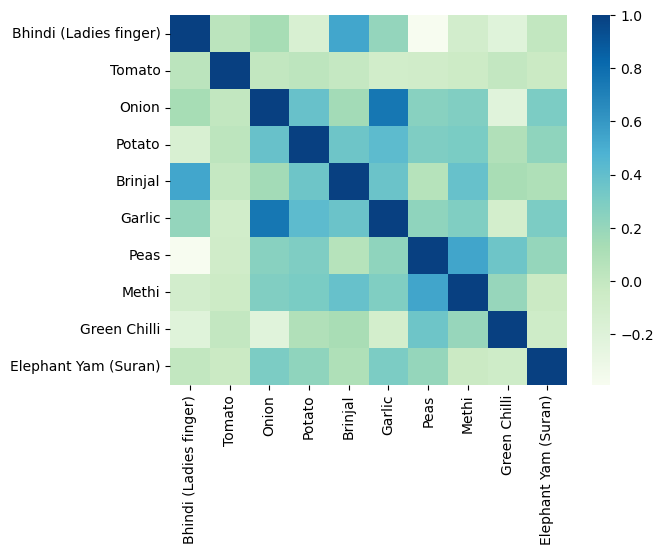

In [ ]:
#Create a Correlation matrix
sns.heatmap(prices_corr, cmap = 'GnBu')

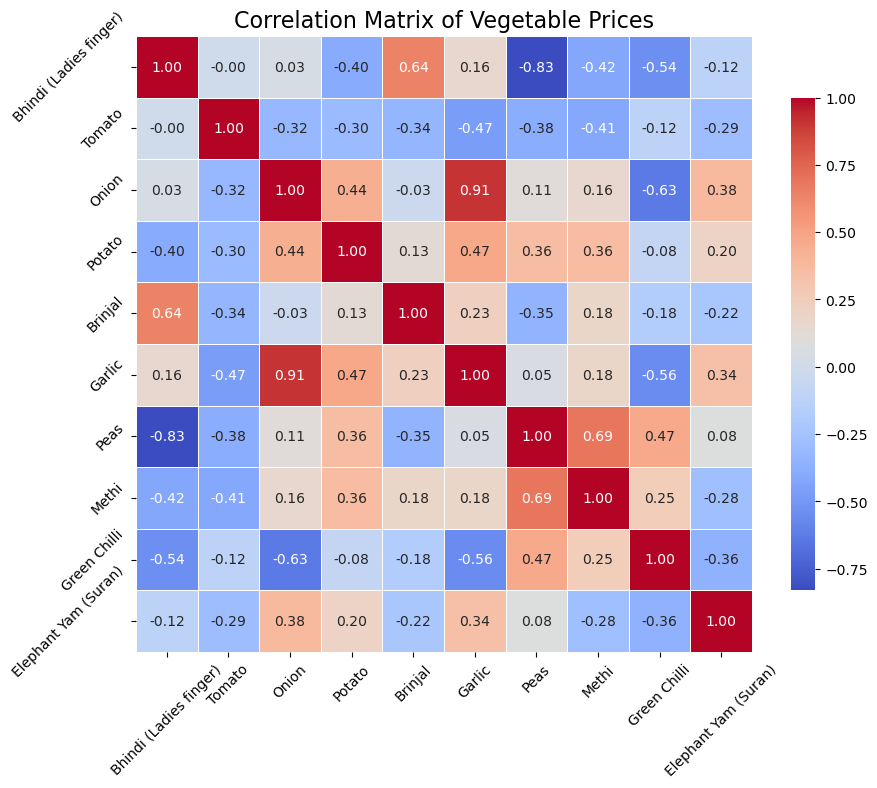

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create your correlation matrix
data = {
    "Bhindi (Ladies finger)": [1.000000, 0.040505, 0.135353, -0.142327, 0.534585, 0.211865, -0.391240, -0.095967, -0.209258, 0.010470],
    "Tomato": [0.040505, 1.000000, 0.006829, 0.030737, -0.008361, -0.081934, -0.074097, -0.051660, 0.004062, -0.034045],
    "Onion": [0.135353, 0.006829, 1.000000, 0.380323, 0.147386, 0.755264, 0.255033, 0.280014, -0.214595, 0.300265],
    "Potato": [-0.142327, 0.030737, 0.380323, 1.000000, 0.353733, 0.419036, 0.289854, 0.307553, 0.087301, 0.225328],
    "Brinjal": [0.534585, -0.008361, 0.147386, 0.353733, 1.000000, 0.367036, 0.063371, 0.380543, 0.125150, 0.096391],
    "Garlic": [0.211865, -0.081934, 0.755264, 0.419036, 0.367036, 1.000000, 0.224896, 0.287657, -0.100149, 0.299406],
    "Peas": [-0.391240, -0.074097, 0.255033, 0.289854, 0.063371, 0.224896, 1.000000, 0.540051, 0.358317, 0.202458],
    "Methi": [-0.095967, -0.051660, 0.280014, 0.307553, 0.380543, 0.287657, 0.540051, 1.000000, 0.197185, -0.032859],
    "Green Chilli": [-0.209258, 0.004062, -0.214595, 0.087301, 0.125150, -0.100149, 0.358317, 0.197185, 1.000000, -0.063119],
    "Elephant Yam (Suran)": [0.010470, -0.034045, 0.300265, 0.225328, 0.096391, 0.299406, 0.202458, -0.032859, -0.063119, 1.000000]
}

# Convert to DataFrame
prices_df = pd.DataFrame(data, index=data.keys())

# Compute the correlation matrix
prices_corr = prices_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(prices_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Matrix of Vegetable Prices', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()


In [16]:
import pandas as pd
prices_df = pd.read_csv("prices.csv")

#displaying the first 300 rows of the price dataframe

prices_df.head(300)


,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40


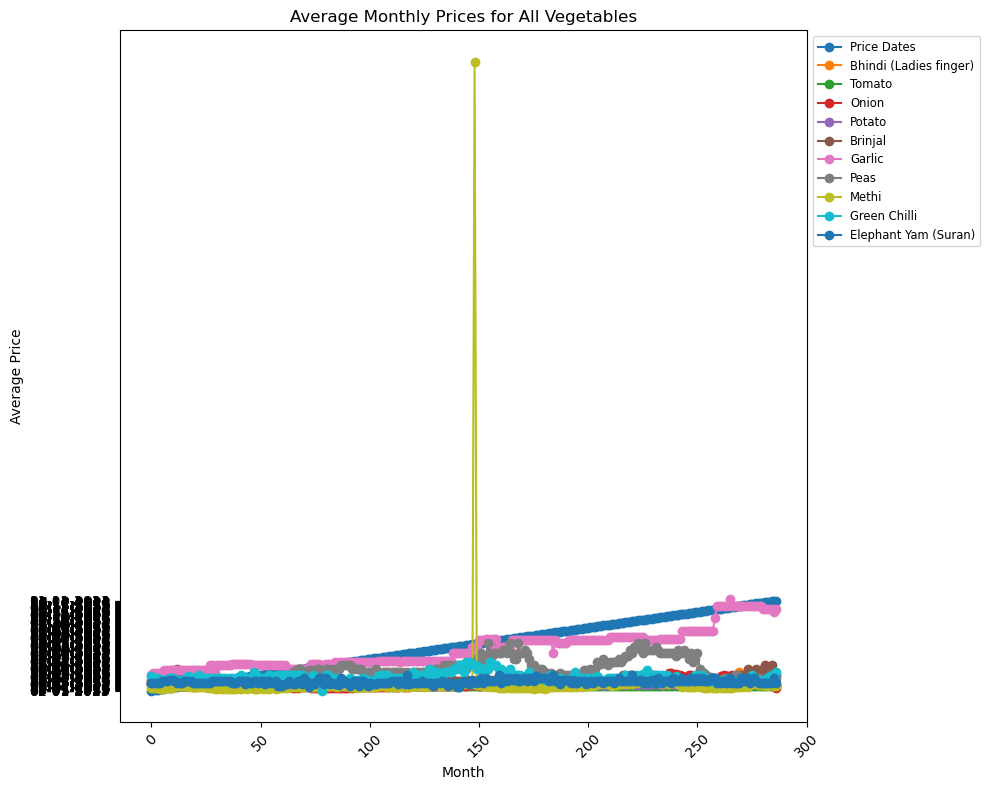

In [20]:
# Plotting the line graph for all the vegetables in the dataset
plt.figure(figsize=(10, 8))

# Loop through all columns (vegetables) and plot their monthly average prices
for column in prices_df.columns:
    plt.plot(prices_df.index, prices_df[column], label=column, marker='o')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Prices for All Vegetables')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Display the graph with proper formatting for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
